In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sys
sys.path.append("..")
import fastcat as fc

In [2]:
ztrues=np.array([0.1,0.4,0.8,1.0])
zmin=0.
zmax=1.4
npoints=1000
zar=np.linspace(zmin,zmax,npoints)
res = zmax/npoints

In [3]:
#available methods
pzs=[]
pzs.append(("Gauss",fc.photoz.PhotoZGauss(0.02)))
pzs.append(("TwoPop",fc.photoz.PhotoZTwoPop(0.02,0.75,3.)))
pzs.append(("HiddenVar",fc.photoz.PhotoZHiddenVar(0.02,[0.1,0.2],[0.6,0.65])))
#pzs.append(("Franzona",fc.photoz.PhotoZHist("/project/projectdirs/lsst/LSSWG/Franzona/pzdist.txt")))
    #perhaps this file should be part of fastcat
pzs.append(('TemplateSED',fc.photoz.PhotoZTemplateSED("/Users/aimalz/Documents/Photoz-tools/")))

Applying Template SED PZs
6
2
5
1


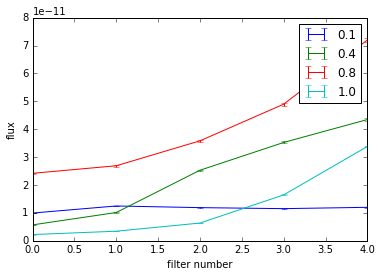

In [4]:
colors = 'bgrymy'
pz = pzs[-1][1]

#demonstrate fluxes
result = pz.applyPhotoZ(np.array(ztrues,dtype=[('z',np.float32)]))

plt.figure(figsize=(6,4))
f_obs,sigma = result
bands=range(5)
for g in range(len(ztrues)):
    #print(photo['flux'])
    plt.errorbar(bands,f_obs[g],yerr=sigma[g],label=ztrues[g])#['flux'])
plt.xlabel('filter number')
plt.ylabel('flux')
plt.legend()

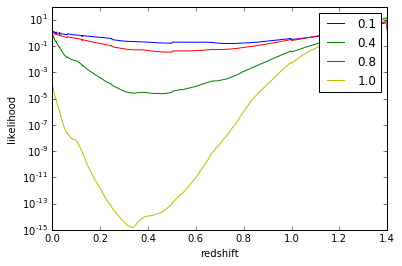

In [5]:
#demonstrate PDF
pdfs = np.array([pz.PofZ(result,float(z),res) for z in zar]).T

plt.figure(figsize=(6,4))
ymin,ymax=plt.ylim()
for z in range(len(ztrues)):
    pdfs[z]/=np.sum(pdfs[z]*res)
    #print(np.sum(pdfs[z]*res))
    plt.plot(zar,pdfs[z],c=colors[z],label=str(ztrues[z]))
    plt.plot([ztrues[z],ztrues[z]],[ymin,ymax],c=colors[z],lw=4)
plt.semilogy()
plt.legend()
plt.ylabel('likelihood')
plt.xlabel('redshift')

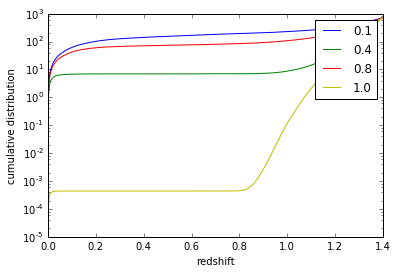

In [15]:
#demonstrate CDF
zcdf = ztrues
#cdfs = np.array([pz.cPofZ(result,float(z)) for z in zcdf]).T

plt.figure(figsize=(6,4))
ymin,ymax=plt.ylim()
for z in range(len(ztrues)):
    plt.plot(zar,np.cumsum(pdfs[z]),c=colors[z],label=str(ztrues[z]))
    #plt.plot(zcdf,cdfs[z],c=colors[z],label=str(ztrues[z]))
    plt.plot([ztrues[z],ztrues[z]],[ymin,ymax],c=colors[z],lw=4)
plt.semilogy()
plt.legend()
plt.ylabel('cumulative distribution')
plt.xlabel('redshift')

In [ ]:
#original demo
matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)
for ztrue in ztrues:
    plt.figure(figsize=(6,4))
    for name,pz in pzs:
        arr=np.array(np.array([ztrue]),dtype=[('z',np.float32)])
        arr=pz.applyPhotoZ(arr)
        print arr
        p=np.array([pz.PofZ(arr,z,res) for z in zar])
        p/=np.sum(p*res)#p.sum()
        plt.plot(zar,p,label=name)
    plt.legend()
    ymin,ymax=plt.ylim()
    plt.plot([ztrue,ztrue],[ymin,ymax],'r--',lw=4)
    plt.ylim(ymin,ymax)
    plt.xlabel("z",fontsize=14)
    plt.ylabel("p(z)",fontsize=14)
    plt.tight_layout()
    plt.savefig ('ptest'+str(ztrue)+'.pdf')